## Week 4 Demo: Data Visualizations, EDA, and Geospatial
#### This demo is adapted from D3.

#### First of all, let's import libraries needed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's then load and clean our data:

The cell below is for better visualizations:

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.options.display.precision = 2

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# read in and clean up the data
survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')
survey  = survey.iloc[1:,2:]
survey.columns = ['smoking','alcohol','gambling',
 'skydiving','speeding', 'cheated',
 'steak', 'steak_preference','gender',
 'age', 'income', 'education', 'region']
survey = survey.dropna(how='all')
survey.head()

,smoking,alcohol,gambling,skydiving,...,age,income,education,region
2,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,No,Yes,Yes,No,...,> 60,"$150,000+",Graduate degree,South Atlantic
4,Yes,Yes,Yes,No,...,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
6,No,No,No,No,...,18-29,"$0 - $24,999",Some college or Associate degree,West South Central


### Several Exploratory Data Analysis and Data Visualizations:

How can we count the number of each unique answers in a column?

We can use the following line of code:
```python
survey['alcohol'].value_counts()
```
to count the number of occurrences of each unique response in the alcohol column of the survey DataFrame.

- ```survey['alcohol']``` selects the column containing responses about alcohol consumption.
- ```.value_counts()``` returns a ```Series``` showing the **frequency** of each unique value, sorted in **descending** order.

In [4]:
survey['alcohol'].value_counts()

alcohol
Yes    416
No     125
Name: count, dtype: int64

Then how can we make a barplot with Seaborn?

We can use **count plot** to visualize the distribution of alcohol consumption responses, broken down by gender:

```python
plot_alcohol = sns.countplot(x='alcohol',  # The x-axis represents alcohol consumption frequency
                             hue='gender',  # Different bar colors indicate different genders
                             data=survey)   # Data source: 'survey' DataFrame
plt.show()  # Displays the plot


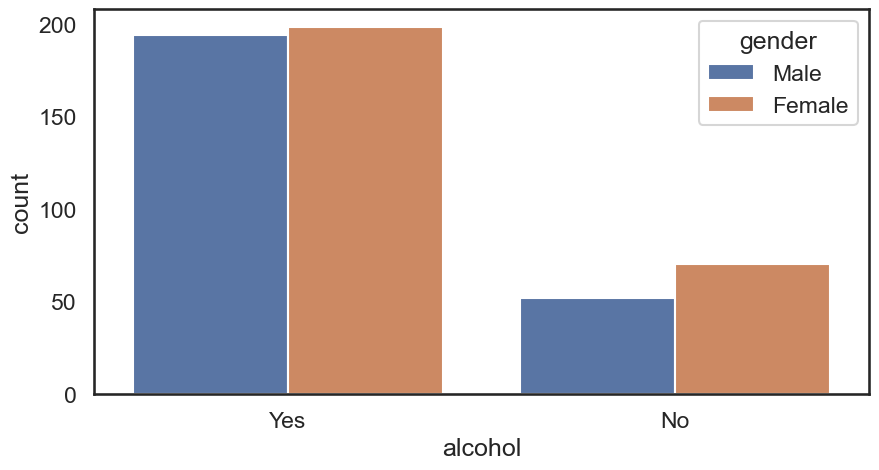

In [5]:
plot_alcohol = sns.countplot(x = 'alcohol',
              hue = 'gender',
              data = survey);

plt.show()

How to create a proportional table of alcohol consumption by gender?

The following code calculates the **proportion of each alcohol consumption response** within each gender category:

```python
prop_df = (survey.groupby(['gender'])['alcohol']
           .value_counts(normalize=True)  # Calculate proportions within each gender group
           .rename('proportion')          # Rename the resulting series to 'proportion'
           .reset_index())                # Convert the series to a DataFrame with default indexing


The resulting 'prop_df' DataFrame will have columns:
- ```'gender'```: The ```gender``` category
- ```'alcohol'```: The ```'alcohol'``` value within that category
- ```'proportion'```: The **proportion** of occurrences of each ```'alcohol'``` value within the corresponding ```'gender'``` category.

In [6]:
# This will generate a new pd.Series:
survey.groupby(['gender'])['alcohol'].value_counts(normalize = True)

gender  alcohol
Female  Yes        0.74
        No         0.26
Male    Yes        0.79
        No         0.21
Name: proportion, dtype: float64

In [7]:
# We can raname the series and convert it to a DataFrame:
prop_df = (survey.groupby(['gender'])['alcohol']
           .value_counts(normalize = True)
           .rename('proportion')
           .reset_index())

prop_df

,gender,alcohol,proportion
0,Female,Yes,0.74
1,Female,No,0.26
2,Male,Yes,0.79
3,Male,No,0.21


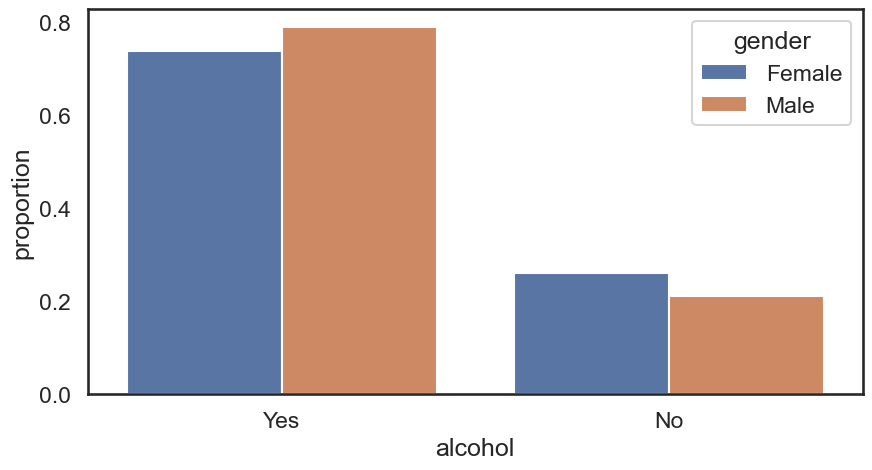

In [8]:
# Plot the data:

plot_proportion = sns.barplot(x = 'alcohol', # The x-axis still represents the 'alcohol' values
            y = 'proportion', # Now the y-axis represents the 'proportion' values
            hue = 'gender', 
            data = prop_df);

plt.show()

How do we change the hue order in a barplot?

We can use ```hue_order```, which specifies the order of legend entries and bar colors to ensure consistent and interpretable plotting.

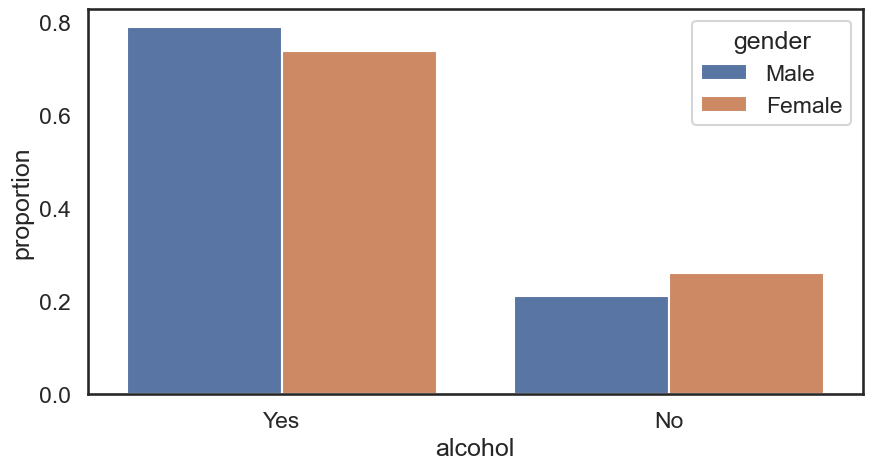

In [9]:
plot_reorder = sns.barplot(x = 'alcohol', 
            y = 'proportion', 
            hue = 'gender', 
            hue_order = ["Male","Female"], # Make the hue order as ['Male', 'Female']
            data = prop_df);

How to make a barplot in different color and orientation?

You can use the `x` and `y` arguments to switch the orientation, and the `palette` argument to customize colors, for example:
```python
plot_reorder = sns.barplot(x = 'proportion', # We can change the orientation by simply swap the x and y axis
            y = 'alcohol', 
            hue = 'gender', 
            hue_order = ["Male","Female"], # Make the hue order as ['Male', 'Female']
            palette = "magma", # Change the palette to "magma"
                               # For more palettes, go to https://seaborn.pydata.org/tutorial/color_palettes.html
            data = prop_df)
```

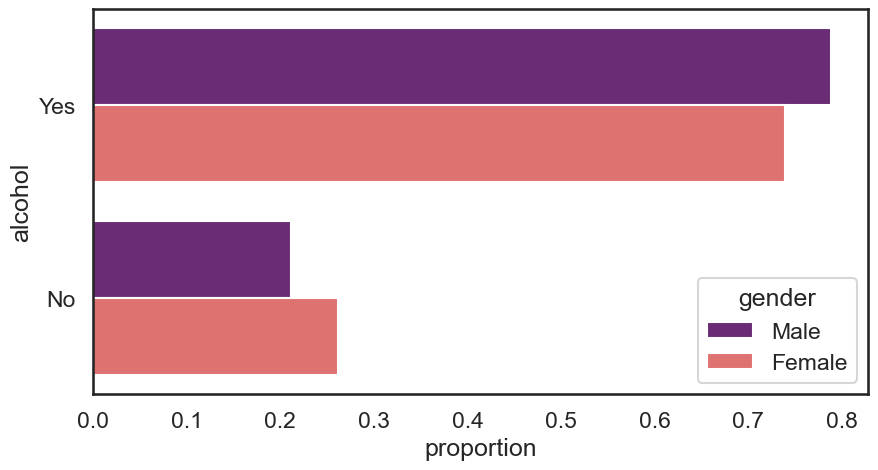

In [10]:
plot_reorder = sns.barplot(x = 'proportion',
            y = 'alcohol', 
            hue = 'gender', 
            hue_order = ["Male","Female"],
            palette = "magma", 
            data = prop_df)

### Geospatial
We’ll take a quick look at geospatial data, which links information to specific locations on Earth (using coordinates like longitude and latitude).
To do this, we’ll use two packages:
- geopandas – to handle and visualize geographic data on maps
- libpysal – to access sample geospatial datasets

In [12]:
!pip install geopandas libpysal

In [11]:
# Let's just import these two packages here:
import geopandas as gpd
import libpysal as ps

We’ll use a sample geospatial dataset from `libpysal`, which contains neighborhood-level statistics for Columbus, Ohio.
One variable of interest is `CRIME`, representing the number of residential burglaries and vehicle thefts per 1,000 households.
Let’s load the dataset and store it in a variable called `columbus_data`:

In [13]:
pth = ps.examples.get_path("columbus.shp")
columbus_data = gpd.GeoDataFrame.from_file(pth)

In [14]:
# Let's take a look of the data:
columbus_data.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,...,CP,THOUS,NEIGNO,geometry
0,0.31,2.44,2,5,...,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.5597 14.74245, 8..."
1,0.26,2.24,3,1,...,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.19,2.19,4,6,...,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.08,1.43,5,2,...,0.0,1000.0,1002.0,"POLYGON ((8.4595 13.82035, 8.47341 13.83227, 8..."
4,0.49,3.00,6,7,...,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


Next, let’s create a histogram of the `CRIME` variable to see how crime rates vary overall:

<Axes: xlabel='CRIME', ylabel='Count'>

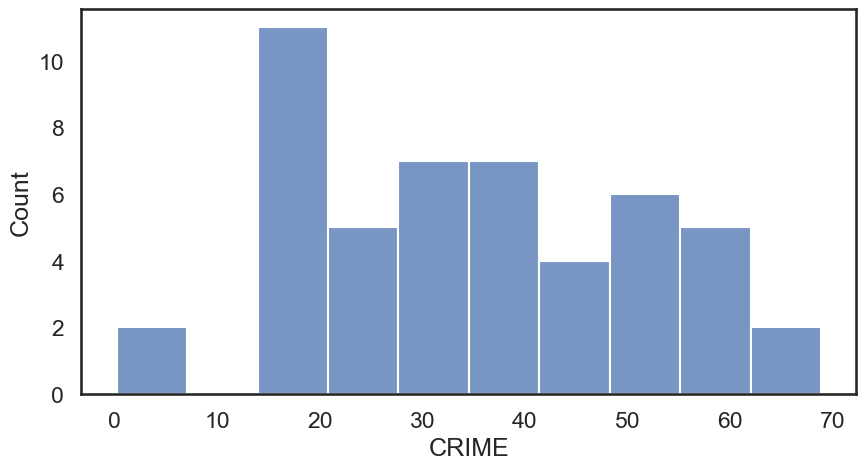

In [15]:
plot_crime = sns.histplot(columbus_data['CRIME'], bins = 10)
plot_crime

While the histogram gives us a sense of overall crime distribution, it doesn’t tell us where high-crime neighborhoods are located.
To visualize this spatially, we can use a choropleth map — where neighborhoods are shaded based on their `CRIME` values:
```python

columbus_data.plot( # creats a choropleth map
column="CRIME", # tells GeoPandas to color each neighborhood based on its crime rate
cmap="Reds", # sets the color palette; darker reds indicate higher crime rates
legend=True, # adds a color scale legend to interpret the shading
figsize=(8, 6)) # defines the size of the figure in inches

plt.axis("off") # Removes the x- and y-axis ticks and labels to make the map look cleaner

plt.show() #Displays the final choropleth map

```

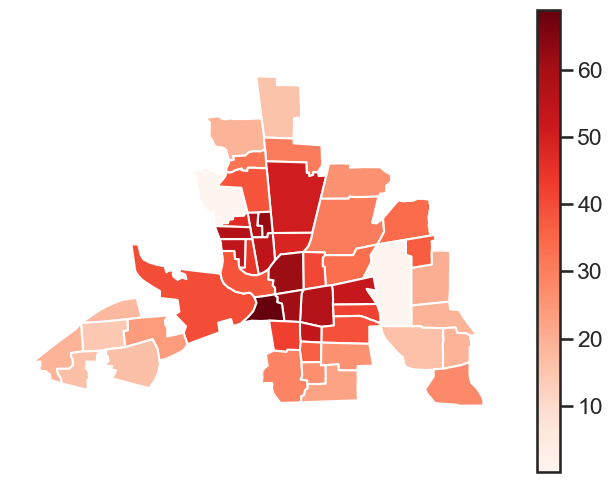

In [16]:
# Plot choropleth map of crime rates
columbus_data.plot(column="CRIME", cmap="Reds", legend=True, figsize=(8, 6))
plt.axis("off")
plt.show()

This map lets us see the geographic patterns of crime — for example, whether high-crime areas cluster together or are spread across the city.

Hope this helps you to complete D3!